In [2]:
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
%matplotlib inline
set_matplotlib_formats('svg')
img = plt.imread("spinning_up/ant_benchmark.png")

In [2]:
import pandas as pd
import numpy as np

In [3]:
sac_run1_test_ep_ret_spinup = pd.read_csv('spinning_up/ant_single_run.txt', delimiter='\t')['AverageTestEpRet'].to_numpy()
sac_run1_test_ep_ret = pd.read_csv('Ant-v3/sac/1/progress.csv')['test_ep_ret'].to_numpy()

In [5]:
from scipy.signal import savgol_filter  # no edge effect

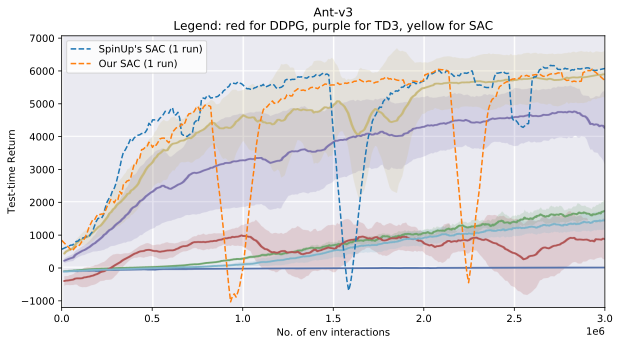

In [42]:
fig, ax = plt.subplots(figsize=(10, 5))

estimated_low = -1200
estimated_high = 7070

ax.imshow(img, interpolation='none', extent=[0, int(3e6), estimated_low, estimated_high])
ax.set_aspect(int(3e6)/(estimated_high - estimated_low) * 0.5)

ax.plot(
    np.linspace(0, int(int(3e6)), len(sac_run1_test_ep_ret)), 
    savgol_filter(sac_run1_test_ep_ret_spinup, 11, 1), 
    linestyle='--',
    label="SpinUp's SAC (1 run)"
)

ax.plot(
    np.linspace(0, int(int(3e6)), len(sac_run1_test_ep_ret)), 
    savgol_filter(sac_run1_test_ep_ret, 11, 1), 
    linestyle='--',
    label='Our SAC (1 run)'
)

plt.ylim(estimated_low, estimated_high)
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

plt.legend(loc='upper left')
plt.xlabel('No. of env interactions')
plt.ylabel('Test-time Return')
plt.title('Ant-v3\nLegend: red for DDPG, purple for TD3, yellow for SAC')
plt.show()